In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('Bengaluru_House_Pricing.csv') 
df.head()  

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [3]:
df['size'].fillna(df['size'].mode()[0], inplace=True)
df['bath'].fillna(df['bath'].median(), inplace=True)

df.isnull().sum()


location      1
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [4]:
df.dropna(subset=['location'], inplace=True)

In [5]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13319 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13319 non-null  object 
 2   total_sqft  13319 non-null  object 
 3   bath        13319 non-null  float64
 4   price       13319 non-null  float64
dtypes: float64(2), object(3)
memory usage: 624.3+ KB


In [13]:
import re  

def clean_sqft(x):
    if pd.isnull(x):  
        return np.nan
    if '-' in x:  
        a, b = x.split('-')
        return (float(a) + float(b)) / 2
    else:
        num = re.sub(r"[^\d\-+\.]", "", x) 
        return float(num.rstrip('.')) 

df['total_sqft'] = df['total_sqft'].apply(clean_sqft)


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13319 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13319 non-null  object 
 2   total_sqft  13319 non-null  float64
 3   bath        13319 non-null  float64
 4   price       13319 non-null  float64
dtypes: float64(3), object(2)
memory usage: 624.3+ KB


In [16]:
df['size'] = df['size'].str.extract(r'(\d+)')[0].astype(float)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13319 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13319 non-null  float64
 2   total_sqft  13319 non-null  float64
 3   bath        13319 non-null  float64
 4   price       13319 non-null  float64
dtypes: float64(4), object(1)
memory usage: 624.3+ KB


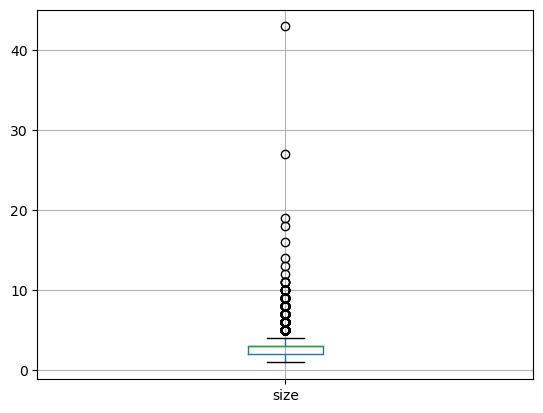

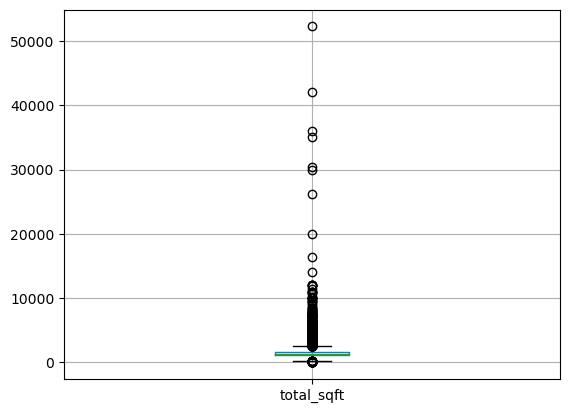

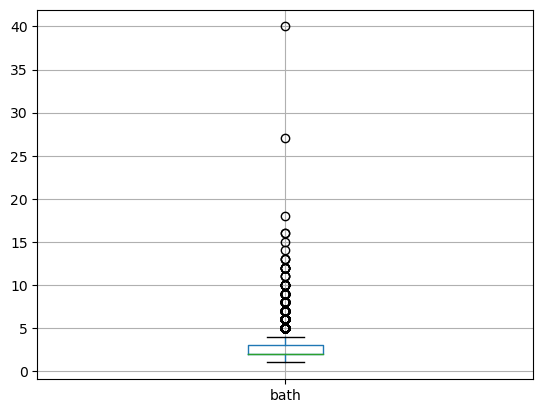

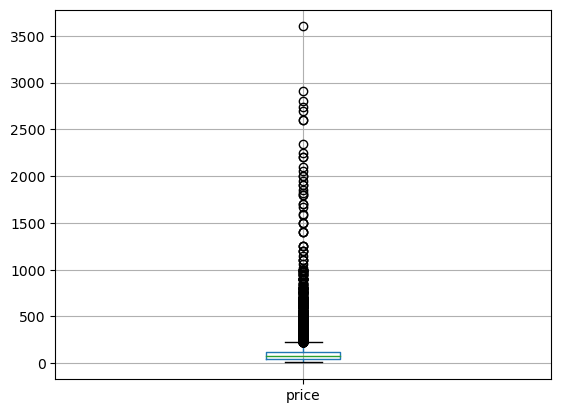

In [42]:
import matplotlib.pyplot as plt

for column in ['size', 'total_sqft', 'bath', 'price']:
    plt.figure() 
    df.boxplot(column=column)
    plt.show()


In [18]:
X = df[['size', 'total_sqft']]  # Select features for our model
y = df['price']


In [30]:
model = LinearRegression()

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')  

In [38]:
avg_mse = -scores.mean() 
rmse = np.sqrt(avg_mse)
r2 = r2_score(y_test, y_pred)
print("Cross-Validation MSE:", avg_mse)
print("Cross-Validation RMSE:", rmse)
print("R-squared:", r2)

Cross-Validation MSE: 14550.674944437977
Cross-Validation RMSE: 120.62617852041063
R-squared: 0.37562708210199114


In [39]:
model.fit(X_train, y_train)

LinearRegression()

In [40]:
y_pred = model.predict(X_test)

In [37]:
new_data = [[3, 1056]]
predicted_price = model.predict(new_data)

print("Predicted Price:", predicted_price[0])


Predicted Price: 88.72436040247949


C:\Users\varsh\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
